# Homework 6

Let's consider classification task for ``digits`` dataset.

* Digit dataset: ``sklearn.datasets.load_digits()``.
  * This dataset is made up of 1797 images of size 8 x 8. Each image is of a hand-written digit. 
  * Input feature is an 8 x 8 image of integer pixels in the range 0 .. 16. 
  * Split into training (80%) and test set (20%).
 
* Use any type of classifer model provided in Scikit-Learn.
* Training the model on training dataset.
* Predict labels for test dataset and evaluate the accuracy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import any necessary module you need
import sklearn


from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



## Get the dataset of digits

* Load the dataset in name ``X_digits`` and ``y_digits``.

In [4]:
# your code here
X_digits , y_digits  = datasets.load_digits(return_X_y=True)


In [5]:
print(X_digits.shape)
print(y_digits.shape)

(1797, 64)
(1797,)


* We will do some data preparation: scaling into the range $[0,1]$.

In [6]:
X_digits = X_digits / X_digits.max()

* Let's visualize the digits dataset

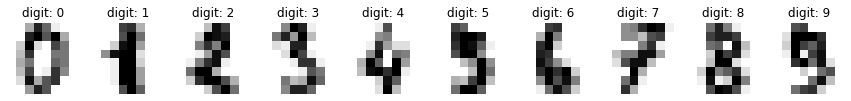

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,3))

for ax, image, label in zip(axes, X_digits, y_digits):
  ax.set_axis_off()
  image = image.reshape(8,8)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('digit: %d' %(label))

plt.show()

## Train-Test dataset split

* Make 80% of data as training, and the remaining 20% of data as test set. 
* Do not split manually, but use some Scikit-Learn function that randomly shuffle the dataset before applying split. 
* Set the training set ``X_train, y_train`` and the test set ``X_test, y_test``.

In [9]:
# your code here
X_train, X_test , y_train ,y_test= train_test_split(X_digits,y_digits, test_size = 0.2 , random_state = 11 )


In [10]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


## Train and Predict a classifier model 

* Select any type of classifier models provided in Scikit-Learn and Instantiate a classifier model.

In [12]:
# your code here
a= DecisionTreeClassifier(max_depth = 3 , random_state = 11 )
a


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

* Fit the model on training dataset.

In [13]:
# your code here
b= a.fit(X_train,y_train)
b

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

* Predict labels for test dataset.


In [16]:
# your code here
c=a.predict(X_test)
c

array([0, 8, 8, 9, 8, 8, 5, 8, 5, 0, 7, 8, 8, 5, 5, 8, 8, 8, 8, 6, 9, 8,
       0, 6, 8, 8, 8, 8, 8, 8, 7, 0, 8, 7, 8, 5, 8, 0, 5, 8, 8, 9, 6, 5,
       5, 0, 5, 8, 8, 8, 6, 8, 5, 6, 8, 8, 8, 8, 5, 8, 8, 7, 8, 6, 5, 7,
       8, 5, 0, 8, 0, 8, 7, 8, 5, 8, 8, 7, 7, 8, 8, 6, 6, 6, 6, 8, 8, 7,
       8, 8, 8, 8, 5, 8, 0, 8, 6, 8, 8, 8, 6, 8, 5, 0, 8, 8, 7, 5, 8, 5,
       7, 8, 0, 5, 8, 0, 8, 8, 5, 6, 8, 5, 6, 8, 8, 6, 0, 6, 6, 8, 6, 8,
       9, 8, 8, 8, 8, 8, 8, 8, 6, 8, 5, 8, 7, 8, 8, 5, 5, 8, 8, 8, 8, 5,
       8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 6, 7, 8, 8, 9, 8, 0, 6, 8, 0, 8,
       0, 7, 6, 8, 5, 8, 0, 8, 8, 8, 6, 8, 8, 8, 9, 5, 9, 5, 0, 8, 5, 5,
       8, 7, 8, 7, 7, 8, 8, 8, 5, 6, 8, 8, 0, 5, 6, 8, 8, 8, 8, 6, 6, 7,
       8, 6, 0, 7, 6, 6, 0, 7, 5, 8, 8, 8, 0, 8, 8, 0, 8, 5, 7, 6, 5, 8,
       0, 8, 8, 8, 9, 7, 5, 8, 8, 8, 8, 5, 8, 8, 8, 8, 5, 0, 8, 8, 5, 8,
       7, 5, 5, 8, 0, 5, 8, 0, 8, 7, 6, 8, 5, 5, 8, 8, 0, 8, 8, 6, 5, 8,
       8, 8, 5, 9, 0, 8, 5, 8, 8, 8, 8, 8, 8, 5, 8,

* Evaluate the accuracy score of the test set.

In [17]:
# your code here
d=accuracy_score(y_test,c)
d


0.41944444444444445